<a href="https://colab.research.google.com/github/benjaminpope/starwars/blob/master/gan_red_giant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!rm -rf starwars
!git clone https://github.com/benjaminpope/starwars

Cloning into 'starwars'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 471 (delta 41), reused 176 (delta 22), pack-reused 273
Receiving objects: 100% (471/471), 147.67 MiB | 20.81 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [0]:
!mv starwars/gan/* .

mv: cannot move 'starwars/gan/images' to './images': Directory not empty
mv: cannot move 'starwars/gan/__pycache__' to './__pycache__': Directory not empty


In [0]:
ls

'First tests of a simple gan.ipynb'   gan.py    lc_0.png       sample_data/
 gan_ben.ipynb                        images/   __pycache__/   starwars/


In [2]:
from gan import gan 

Using TensorFlow backend.


In [17]:
import pandas as pd
dfile = 'subsampled_4d.csv'
df = pd.read_csv(dfile, sep='\s+', header=None)
df.head()
print(len(df))
data = df.values.T
print(data.shape)

192
(16384, 192)


# New Section

192
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 10)                1930      
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 10)                40        
_________________________________________________________________
dense_72 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 10)                40        
_________________________________________________________________
dense_73 (Dense)             (None, 10)                110       
______

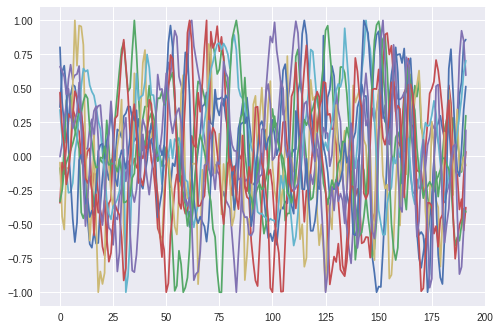

Epoch: 0 D loss: 0.3642221689224243 G loss: 1.8354202508926392
Epoch: 10 D loss: 0.40823641419410706 G loss: 2.334784746170044
Epoch: 20 D loss: 0.30028560757637024 G loss: 1.8013052940368652
Epoch: 30 D loss: 0.4414515495300293 G loss: 1.8737355470657349
Epoch: 40 D loss: 0.42705368995666504 G loss: 1.3805526494979858
Epoch: 50 D loss: 0.5441552400588989 G loss: 1.4929693937301636
Epoch: 60 D loss: 0.6379551887512207 G loss: 1.297483205795288
Epoch: 70 D loss: 0.6581541299819946 G loss: 0.9352171421051025
Epoch: 80 D loss: 0.568695068359375 G loss: 1.1114838123321533
Epoch: 90 D loss: 0.6348016262054443 G loss: 0.9567074775695801
Epoch: 100 D loss: 0.6695176362991333 G loss: 1.0584858655929565
Epoch: 110 D loss: 0.6673668622970581 G loss: 0.7927371263504028
Epoch: 120 D loss: 0.6253381371498108 G loss: 0.8572210669517517
Epoch: 130 D loss: 0.7095689177513123 G loss: 0.7826367020606995
Epoch: 140 D loss: 0.6779494285583496 G loss: 0.7849029302597046
Epoch: 150 D loss: 0.648133814334869

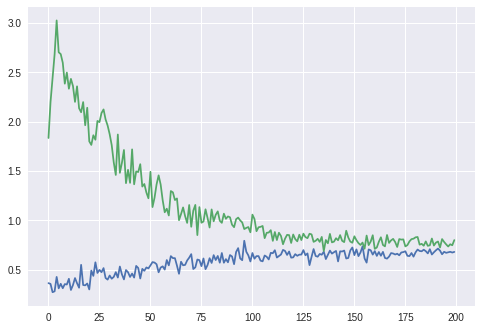

In [19]:
    LSTM = False
    starwars = gan(ndays=4)
    starwars.X_train = df.values.T
    starwars.lc_size = len(starwars.X_train[0, :])

    if LSTM:
        starwars.make_LSTM_generator()
        starwars.make_LSTM_discriminator()
        starwars.LSTM_model()
    else:
        starwars.make_generator(arch=[10, 10, 10])
        starwars.make_discriminator(arch=[10, 10])
        starwars.model(lr=0.001, beta=0.01)
    starwars.plot_some_data()
    plt.show()
    starwars.train(epochs=200, batch_size=50, LSTM=LSTM)
    starwars.plot_losses()
